In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import numpy as np
os.chdir('D:/user/User/pydata')
data=pd.read_csv('Fvote.csv',encoding='utf-8')

In [11]:
data.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [12]:
data.shape

(211, 15)

In [52]:
X=data.iloc[:,0:13] 
# X=data[data.columns[1:13]]
y=data[['vote']]

In [53]:
X.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4


In [54]:
from sklearn.model_selection import GridSearchCV
param_grid={'C': [0.001,0.01, 0.1, 1, 10, 100]}

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score = True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [57]:
print("Best Parameter: {}". format(grid_search.best_params_))
print("best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Parameter: {'C': 0.1}
best Cross-validity Score: 0.709


## Random Search

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}

In [66]:
from sklearn.linear_model import LogisticRegression
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distribs, cv=5,
                                  return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EAF0807BE0>},
                   return_train_score=True)

In [69]:
print("Best Parameter: {}". format(random_search.best_params_))
print("best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 3}
best Cross-validity Score: 0.690


In [71]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033007,0.033516,0.007002,1.101158e-02,99,{'C': 99},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
1,0.014803,0.001166,0.001600,4.900182e-04,74,{'C': 74},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
2,0.017804,0.008729,0.001601,4.905439e-04,19,{'C': 19},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
3,0.013003,0.001415,0.001800,7.486214e-04,3,{'C': 3},0.65625,0.71875,0.6875,0.774194,...,0.689919,0.054780,1,0.706349,0.690476,0.698413,0.700787,0.732283,0.705662,0.014256
4,0.016804,0.001939,0.001601,4.903491e-04,93,{'C': 93},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
5,0.015804,0.002316,0.001400,4.899209e-04,14,{'C': 14},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
6,0.016604,0.001020,0.001400,4.896679e-04,55,{'C': 55},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
7,0.016204,0.002040,0.001600,4.899598e-04,62,{'C': 62},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
8,0.018404,0.002155,0.002000,3.234067e-07,98,{'C': 98},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757
9,0.017204,0.001166,0.001800,4.000903e-04,73,{'C': 73},0.62500,0.68750,0.6875,0.774194,...,0.677419,0.057408,2,0.698413,0.674603,0.706349,0.685039,0.732283,0.699338,0.019757


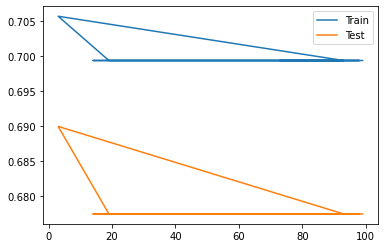

In [73]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_C'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_C'], result_random['mean_test_score'], label="Test")
plt.legend()

In [74]:
Final_model = LogisticRegression(C=10)
Final_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [76]:
pred_train=Final_model.predict(X_train)
Final_model.score(X_train, y_train)

0.6835443037974683